Import Essential Libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

Import Given Functions

In [2]:
# Map X_train to polynomial

def polynomial_feature_mapping(feature1, feature2):
    """
    Feature mapping function to polynomial features
    """
    feature1 = np.atleast_1d(feature1)
    feature2 = np.atleast_1d(feature2)
    degree = 6
    mapped_features = []

    for i in range(1, degree + 1):
        for j in range(i + 1):
            mapped_features.append((feature1**(i - j) * (feature2**j)))

    return np.stack(mapped_features, axis=1)

In [3]:
# Plot Data


def plot_data(features, labels, positive_label="Label 1", negative_label="Label 0"):
    positive_indices = labels == 1
    negative_indices = labels == 0

    # Plot examples
    plt.plot(features[positive_indices, 0], features[positive_indices, 1], 'k+', label=positive_label)
    plt.plot(features[negative_indices, 0], features[negative_indices, 1], 'yo', label=negative_label)

In [4]:
# Visualize Decision Boundary

def visualize_decision_boundary(weights, bias, features, labels):
    # Credit to dibgerge on Github for this plotting code

    plot_data(features[:, 0:2], labels)

    if features.shape[1] <= 2:
        plot_x = np.array([min(features[:, 0]), max(features[:, 0])])
        plot_y = (-1. / weights[1]) * (weights[0] * plot_x + bias)

        plt.plot(plot_x, plot_y, c="b")

    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i, j] = sigmoid(np.dot(polynomial_feature_mapping(u[i], v[j]), weights) + bias)

        # It's important to transpose z before calling contour
        z = z.T

        # Plot z = 0
        plt.contour(u, v, z, levels=[0.5], colors="g")

# **Question 1**

In [9]:
df = pd.read_csv('dataset.txt')
X_train = df.drop('y', axis=1).values
y_train = df['y'].values

In [13]:
print(f"The First 5 Elements of X_train:\n {X_train[:5]}")
print('\n')
print(f"The First 5 Elements of y_train:\n {y_train[:5]}")

The First 5 Elements of X_train:
 [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]


The First 5 Elements of y_train:
 [1 1 1 1 1]


In [12]:
print(f"Shape of the X_train: {X_train.shape}")
print(f"Shape of the y_train: {y_train.shape}")

Shape of the X_train: (118, 2)
Shape of the y_train: (118,)


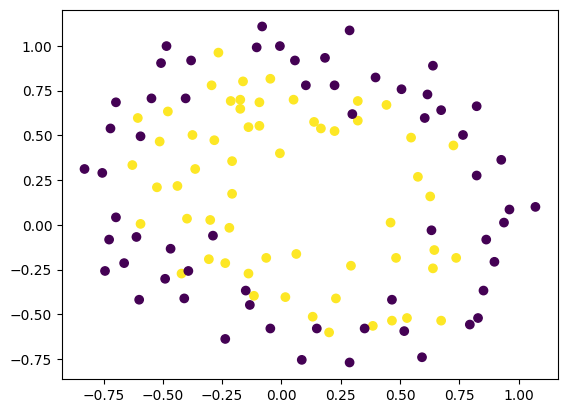

In [15]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

In [16]:
mapped_X = polynomial_feature_mapping (X_train[:, 0], X_train[:, 1])

In [17]:
mapped_X[0]

array([5.12670000e-02, 6.99560000e-01, 2.62830529e-03, 3.58643425e-02,
       4.89384194e-01, 1.34745327e-04, 1.83865725e-03, 2.50892595e-02,
       3.42353606e-01, 6.90798869e-06, 9.42624411e-05, 1.28625106e-03,
       1.75514423e-02, 2.39496889e-01, 3.54151856e-07, 4.83255257e-06,
       6.59422333e-05, 8.99809795e-04, 1.22782870e-02, 1.67542444e-01,
       1.81563032e-08, 2.47750473e-07, 3.38066048e-06, 4.61305487e-05,
       6.29470940e-04, 8.58939846e-03, 1.17205992e-01])

# **Question 2**

In [18]:
def sigmoid(z):

    return 1/(1+np.exp(-z))

In [21]:
sigmoid_samples = np.array([-1, 0.5, 0, 1, 2])
sigmoid(sigmoid_samples)

array([0.26894142, 0.62245933, 0.5       , 0.73105858, 0.88079708])

# **Question 3**

In [40]:
def compute_cost(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (array_like Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value
      w : (array_like Shape (n,)) Values of parameters of the model
      b : (array_like Shape (n,)) Values of bias parameter of the model
      lambda_ : (scalar, float)    Controls amount of regularization
    Returns:
      total_cost: (scalar)         cost
    """

    m, n = X.shape

    # Compute Cost's First term
    cost = 0
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
    first_cost = cost/m

    # Compute Cost's Second term
    reg_cost = 0.
    reg_cost = sum(np.square(w))

    # Add the regularization cost to get the total cost
    total_cost = first_cost + (lambda_/(2 * m)) * reg_cost

    return total_cost

In [41]:
np.random.seed(1)
initial_w = np.array([0.2, 0.2])
initial_b = -24
lambda_ = 1
cost = compute_cost(X_train, y_train, initial_w, initial_b, lambda_)
print("Regularized cost :", cost)

Regularized cost : 11.776934278684013


# **Question 4**

In [30]:
def compute_gradient(X, y, w, b, lambda_ = 1):
    """
    Computes the gradient for linear regression

    Args:
      X : (ndarray Shape (m,n))   variable such as house size
      y : (ndarray Shape (m,))    actual value
      w : (ndarray Shape (n,))    values of parameters of the model
      b : (scalar)                value of parameter of the model
      lambda_ : (scalar,float)    regularization constant
    Returns
      dj_db: (scalar)             The gradient of the cost w.r.t. the parameter b.
      dj_dw: (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w.

    """

    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    # Compute Gradent's First Term
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        err_i  = f_wb_i  - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    # Compute Gradent's Second Term
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw

In [37]:
initial_w  = np.array([0, 0])
initial_b = 0

lambda_ = 1
dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}")
print(f"Elements of regularized dj_dw:\n {dj_dw.tolist()}")

dj_db: 0.00847457627118644
Elements of regularized dj_dw:
 [0.01878809322033899, 7.777118644068388e-05]


# **Question 5**

In [44]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant

    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """

    m = len(X)

    J_history = []

    for i in range(num_iters):

        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)

        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w_in, b_in, J_history

In [45]:
# Shape of the Features
new_shape = mapped_X.shape[1]

# Initialize parameters
initial_w = np.zeros(new_shape)
initial_b = 0.

lambda_ = 0.01
iterations = 10000
alpha = 0.01

w,b, _ = gradient_descent(mapped_X, y_train, initial_w, initial_b,
                                    compute_cost, compute_gradient,
                                    alpha, iterations, lambda_)

Iteration    0: Cost     0.69   
Iteration 1000: Cost     0.62   
Iteration 2000: Cost     0.58   
Iteration 3000: Cost     0.55   
Iteration 4000: Cost     0.53   
Iteration 5000: Cost     0.51   
Iteration 6000: Cost     0.50   
Iteration 7000: Cost     0.48   
Iteration 8000: Cost     0.47   
Iteration 9000: Cost     0.46   
Iteration 9999: Cost     0.45   


# **Question 6**

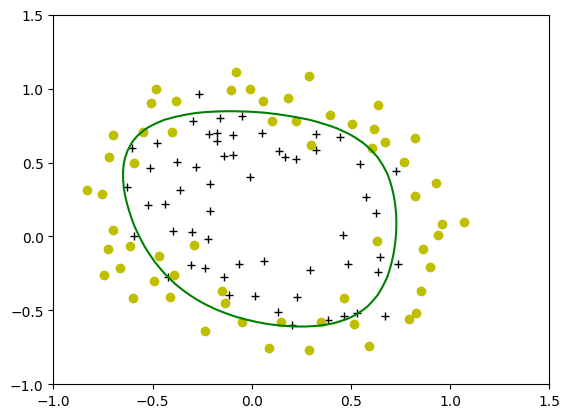

In [46]:
visualize_decision_boundary(w, b, mapped_X, y_train)